<a href="https://colab.research.google.com/github/monu111/Bank-Classifying-term-deposit-subcription/blob/main/Bank_Classifying_Term_Deposit_Subscriptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank**: Classifying Term Deposit Subscriptions

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Bank  

/content/gdrive/MyDrive/Colab Notebooks/Bank


# Objective?
- The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

__Marketing campaigns__ are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign.

### The 4 Ps:

1) Segment of the Population: To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign.

2) Distribution channel to reach the customer's place: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.)

3) Price: What is the best price to offer to potential clients? (In the case of the bank's marketing campaign this is not necessary since the main interest for the bank is for potential clients to open depost accounts in order to make the operative activities of the bank to keep on running.)

4) Promotional Strategy: This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an indepth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

### What is a Term Deposit?

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp

### data set link : https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing

## bank client data:
   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar",
   "entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   
   ### related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


   ### other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

   ### social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

  17 - cons.price.idx: consumer price index - monthly indicator (numeric)    

  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)   

  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):

  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


# 1. importing libraries and data

### 1.1 Importing the libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV



# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### 1.2 Loading the dataset

In [12]:
df = pd.read_csv('bank-additional-full.csv', ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### 1.3 checking the shape of dataset

In [14]:
df.shape

(41188, 21)

- There are total 41188 samples and 21 features.

### 1.4 checking the datatype

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- there are some values non-numeric later we have to convert them into numeric.

### 1.5 checking the descriptive analysis

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Checking the missing values.

In [17]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- There is no null values in given dataset

# 2. Exploratory Data Analysis

In [18]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 2.1 Checking the age distribution.

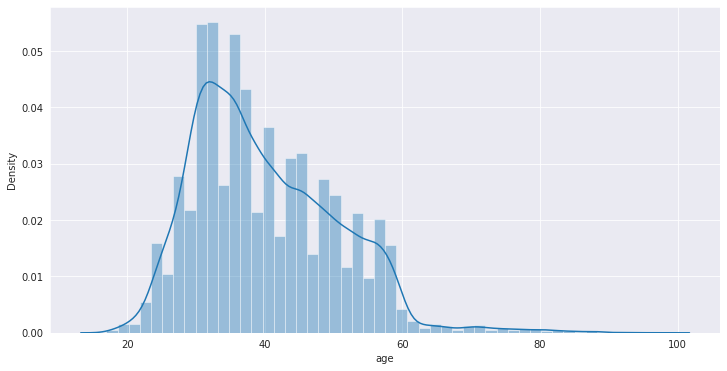

In [19]:
plt.figure(figsize = (12,6))
sns.set_style(style = 'darkgrid')
sns.distplot(df.age)
plt.show()

- From the analysis, the average age of client approx 40 and Minimum: 18 years old and Maximum: approx 95 years old.

No handles with labels found to put in legend.


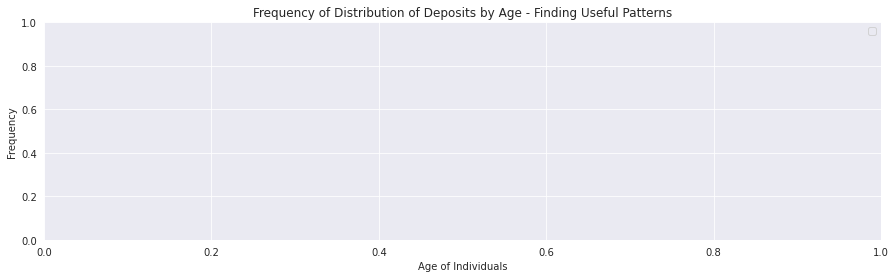

In [20]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['y'] == 0),'age'] , color='#F08080',shade=True,label='Refused T.D. Suscriptions')
ax=sns.kdeplot(df.loc[(df['y'] == 1),'age'] , color='#00FA9A',shade=True, label='Accepted T.D. Suscriptions')
ax.set(xlabel='Age of Individuals', ylabel='Frequency')
plt.title('Frequency of Distribution of Deposits by Age - Finding Useful Patterns')
plt.legend()
plt.show()

### 2.3 Let see how the numeric data distributed

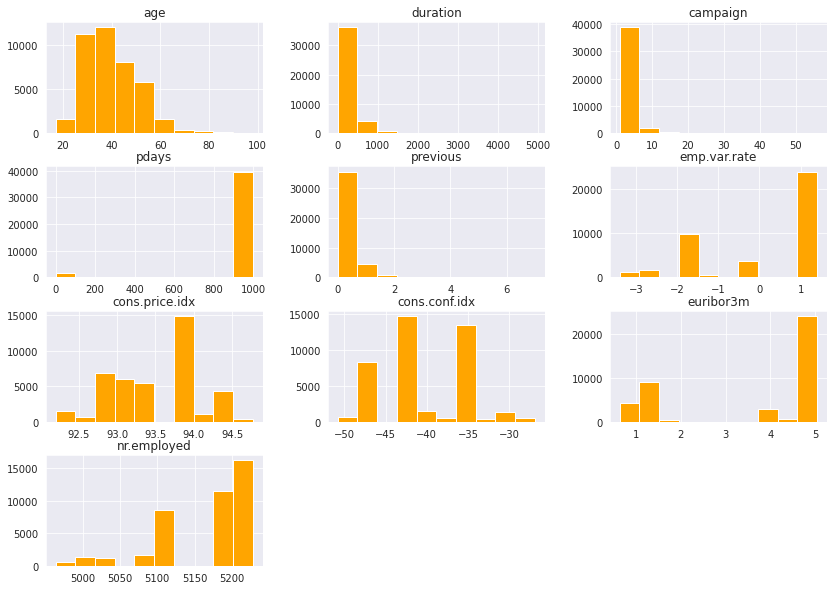

In [21]:
df.hist(bins = 10, figsize =(14,10), color = 'orange')
plt.show()

### 2.3 Types of Jobs

In [22]:
v = df.job.value_counts()

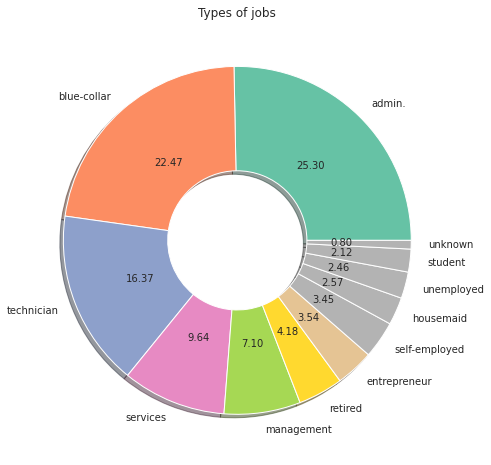

In [23]:
fig = plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color = cmap(np.arange(len(v)))
plt.pie(v, labels = v.index, autopct = '%0.02f', colors = color, shadow = True, wedgeprops = dict(width = 0.6, radius = 1))
plt.title('Types of jobs')
plt.show()

__Insights:__
- From the analysis, 25.30% people do admin jobs, 22.47% people do blue-collar and  16.37% do technician jobs.  

### 2.4 Checking the marital status

In [24]:
v = df.marital.value_counts()

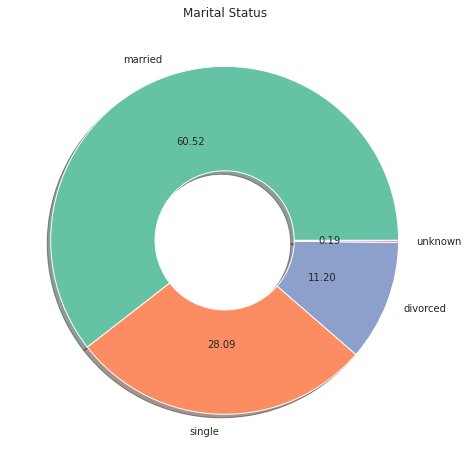

In [25]:
fig = plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, autopct = '%0.02f', colors = color, shadow = True, wedgeprops  = dict(width = 0.6,))
plt.title('Marital Status')
plt.show()

__Insights:__
- From the analysis, 60.52% were married, 28.09% single,  11.20% divorced and 0.19% unknown.Mostly were married.

### 2.5 Education category

In [26]:
v = df.education.value_counts()


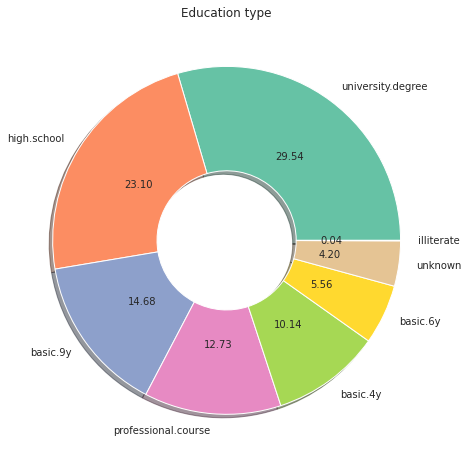

In [27]:
fig = plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, autopct = '%0.02f', colors = color, shadow = True, wedgeprops  = dict(width = 0.6,))
plt.title('Education type')
plt.show()

__Insights:__
- From the analysis, approx 29.54% client have university degree ,23.10% clients high school graduated and 0.04% clients illiterate.

### 2.6 Has credit in default or not ?

- has credit in default

In [28]:
v = df.default.value_counts()

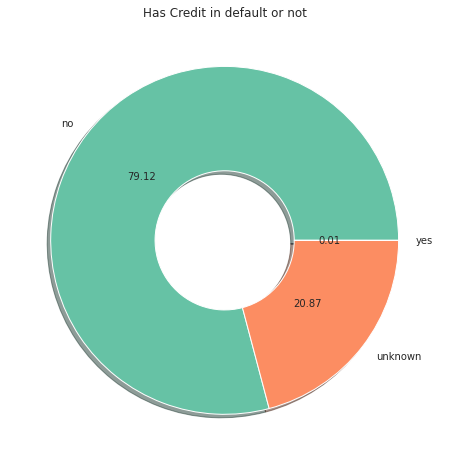

In [29]:
fig = plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, autopct = '%0.02f', colors = color, shadow = True, wedgeprops  = dict(width = 0.6,))
plt.title('Has Credit in default or not')
plt.show()

__Insgihts:__
- From the analysis, 79.12% credit not in default, 20.87% unknown and 0.01% in default.

### 2.7 Has house loan?

In [30]:
v = df.housing.value_counts()

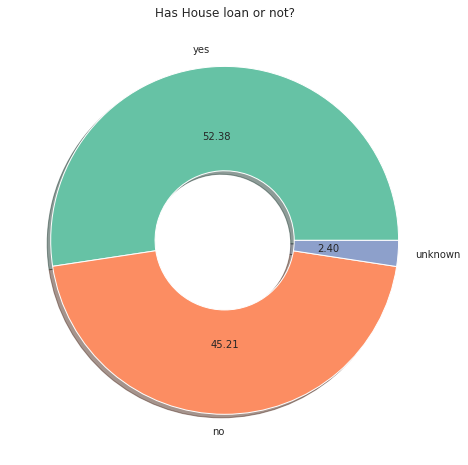

In [31]:
fig = plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, autopct = '%0.02f', colors = color, shadow = True, wedgeprops  = dict(width = 0.6,))
plt.title('Has House loan or not?')
plt.show()

__Insights:__
- From the analysis, 52.38% client have house loan and 45.21% clients don't have house loan and 2.40% unknown. 

### 2.8 Has Personal loan or not?

In [32]:
v1 = df.loan.value_counts()

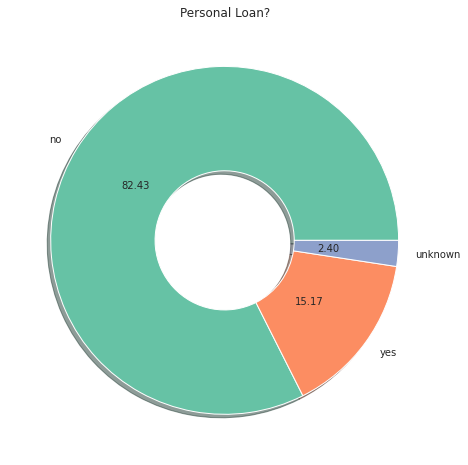

In [33]:
fig = plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color = cmap(np.arange(len(v)))

plt.pie(v1, labels = v1.index, autopct = '%0.02f', colors = color, shadow = True, wedgeprops  = dict(width = 0.6,))
plt.title('Personal Loan?')
plt.show()

__Insights:__
- From the analysis, 82.43% client have personal loan and 15.17% clients don't have personal loan and 2.40% unknown. 

### 2.9 Contact communication type

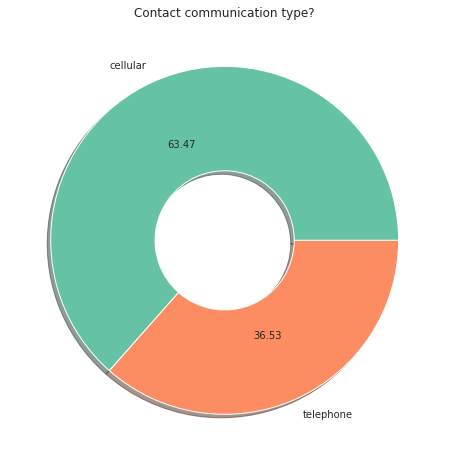

In [34]:
v = df.contact.value_counts()

fig = plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, autopct = '%0.02f', colors = color, shadow = True, wedgeprops  = dict(width = 0.6,))
plt.title('Contact communication type?')
plt.show()

__Insights:__
- From the analysis, 63.47% contacted by cellular phone, 36.53% through telephone.

### 2.10 Last contact month of year

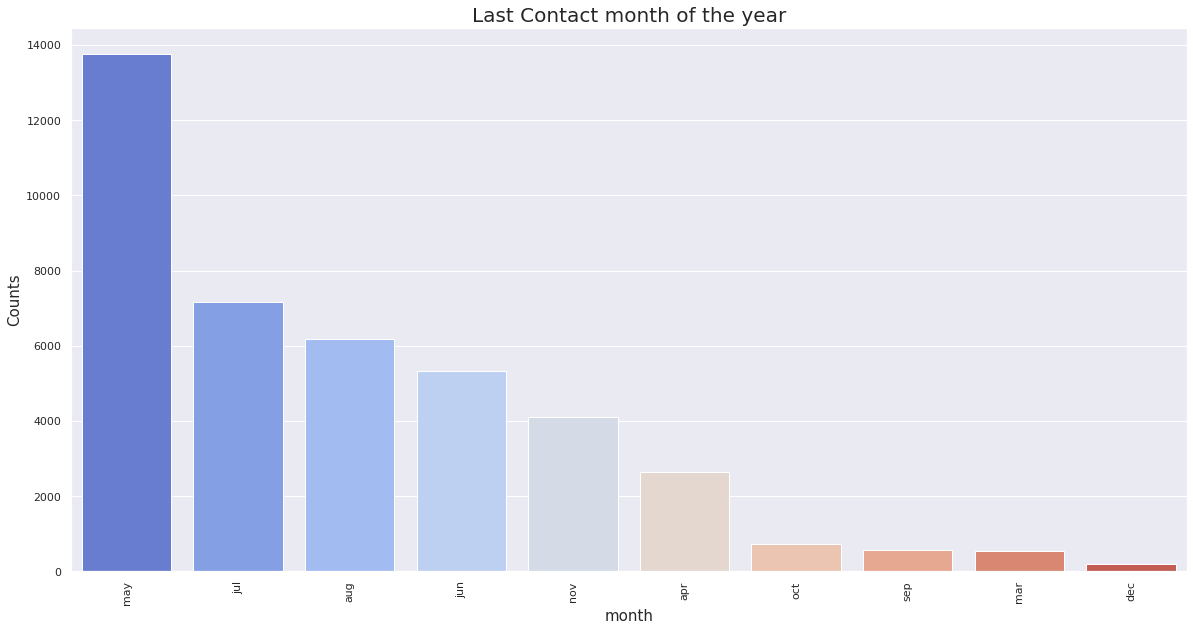

In [35]:
v = df.month.value_counts()
plt.figure(figsize = (20,10))

sns.set(style = 'darkgrid')
sns.barplot(x = v.index, y = v, data = df, palette = 'coolwarm')

plt.xticks(rotation  = 90)

plt.title('Last Contact month of the year', fontsize = 20)
plt.xlabel('month',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
plt.show()

__Insights:__
- From the analysis, Most of the clients last time contacted during May month of the year and less  clients during december month.

### 2.11 Last contact day of the week




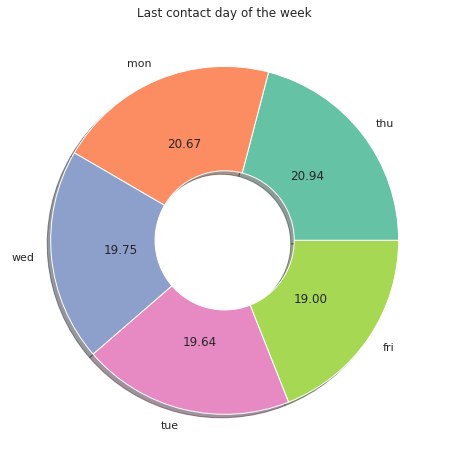

In [ ]:
v = df.day_of_week.value_counts()


fig = plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, autopct = '%0.02f', colors = color, shadow = True, wedgeprops  = dict(width = 0.6,))
plt.title('Last contact day of the week')
plt.show()

__Insights:__
- From the analysis, Most of the clients last time contacted during Monday and thrusday week of the day.

### 2.11 Last contact duration, in seconds

In [ ]:
print(' Maximum duration of contact :', df.duration.max())
print('Average duration of contact :', df.duration.mean())
print('Minimum duration of contact :', df.duration.min())

 Maximum duration of contact : 4918
Average duration of contact : 258.2850101971448
Minimum duration of contact : 0


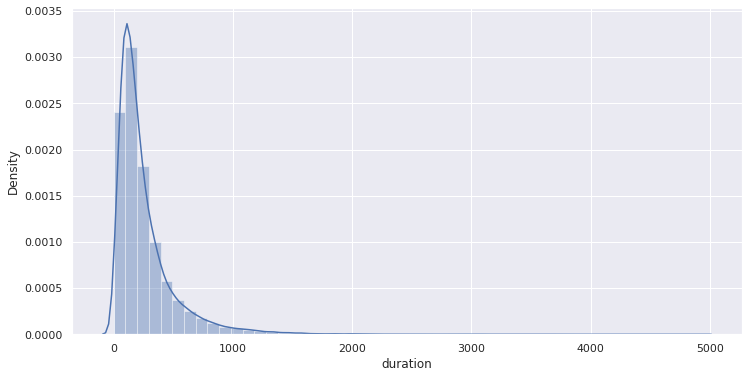

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style(style = 'darkgrid')
sns.distplot(df.duration)
plt.show()

__Insights:__
- From the analysis, the duration of contact from  0 to 4918 second and average duration of contact to cilent was 258.28 second.

### 2.12 Last contact duration(in second) vs month

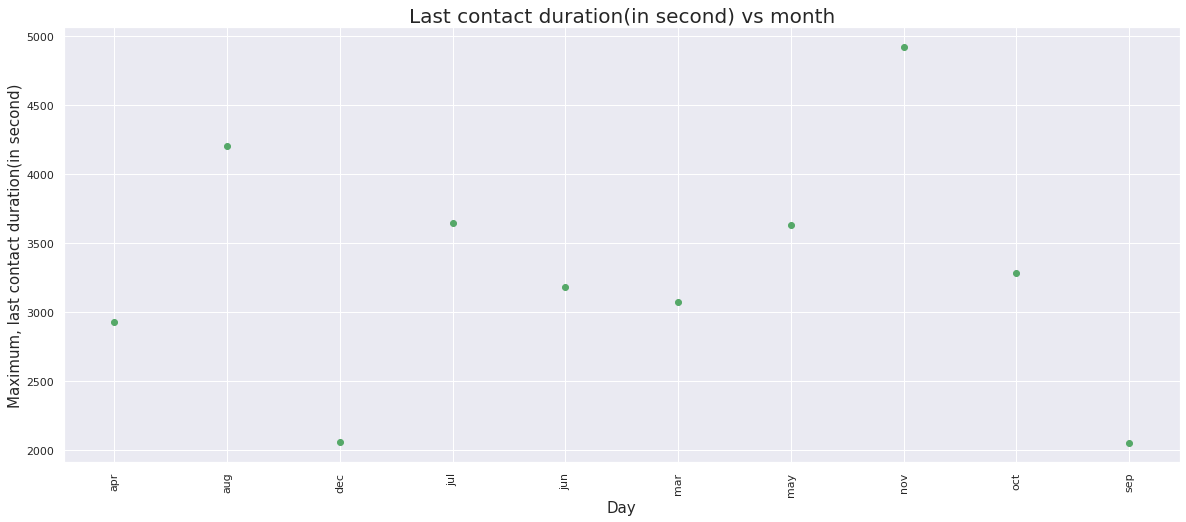

In [ ]:
grp = df.groupby('month')
z = grp['duration'].agg('max')

plt.figure(figsize=(20,8))
plt.plot(z,'go')
plt.xticks(rotation=90)
plt.title('Last contact duration(in second) vs month', fontsize = 20)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Maximum, last contact duration(in second)', fontsize=  15)
plt.show()

__Insights:__
- From the analysis, Maximum last contact duration happend in November month.

### 2.12 Last contact duration(in second) vs day_of_week

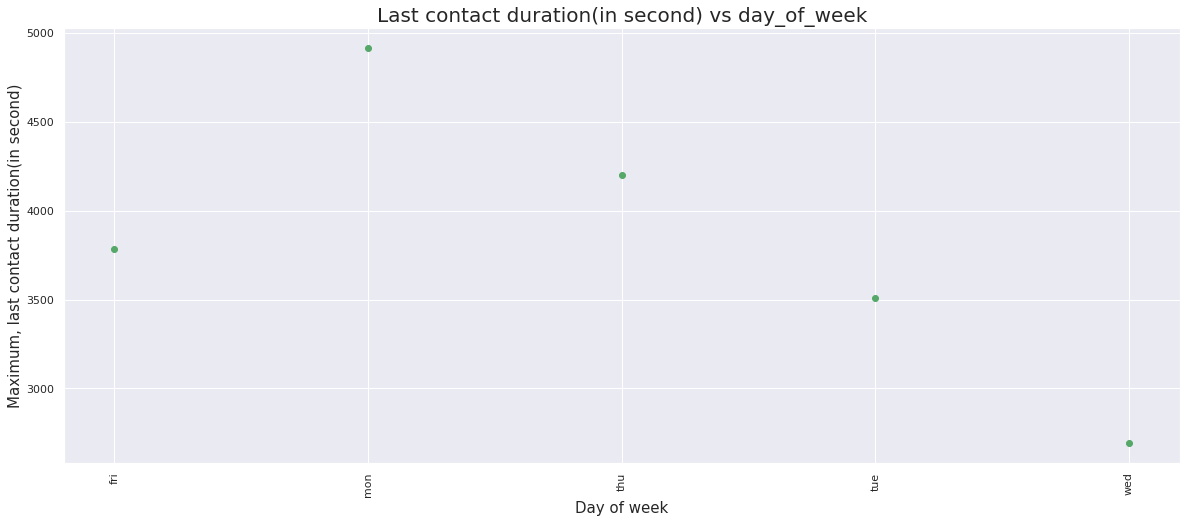

In [ ]:
grp = df.groupby('day_of_week')
x = grp['duration'].agg('max')

plt.figure(figsize = (20, 8))
plt.plot(x, 'go')
plt.xticks(rotation=90)
plt.title('Last contact duration(in second) vs day_of_week', fontsize = 20)
plt.xlabel('Day of week', fontsize = 15)
plt.ylabel('Maximum, last contact duration(in second)', fontsize=  15)
plt.show()

__Insights:__
- From the analysis, maximum last contact duration happend on monday.

### 2.13 Maximum  last call duration vs month vs day of week

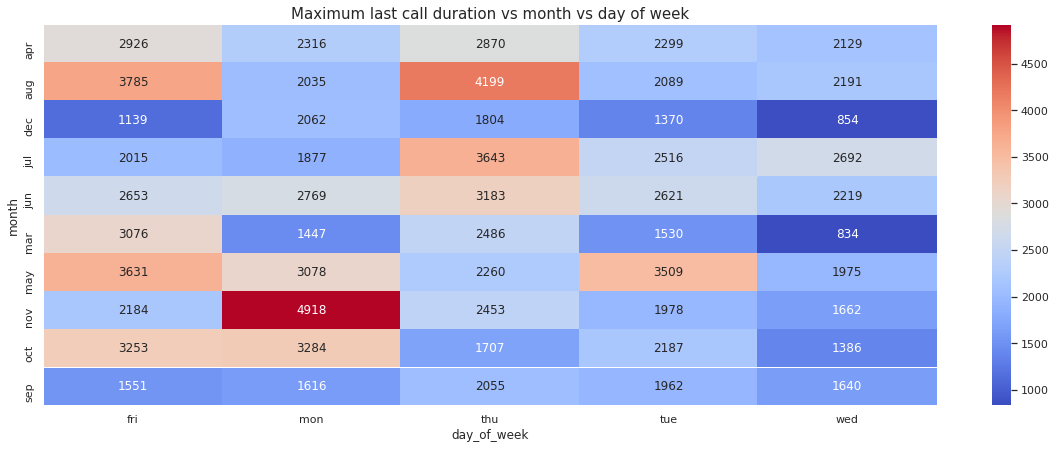

In [ ]:
grp = df.groupby(['month', 'day_of_week'])['duration'].agg('max').reset_index()

group_df = grp.pivot('month', 'day_of_week', 'duration')

plt.figure(figsize=  (20,7))
sns.heatmap(group_df,cmap = 'coolwarm', linewidths= .0001, annot= True, fmt='g')

plt.title('Maximum last call duration vs month vs day of week', fontsize = 15)
plt.show()

__Insights:__
- From the analysis, maximum call duration happend during november month on monday.

### 2.14 Campaign

- campaign: number of contacts performed during this campaign and for this client

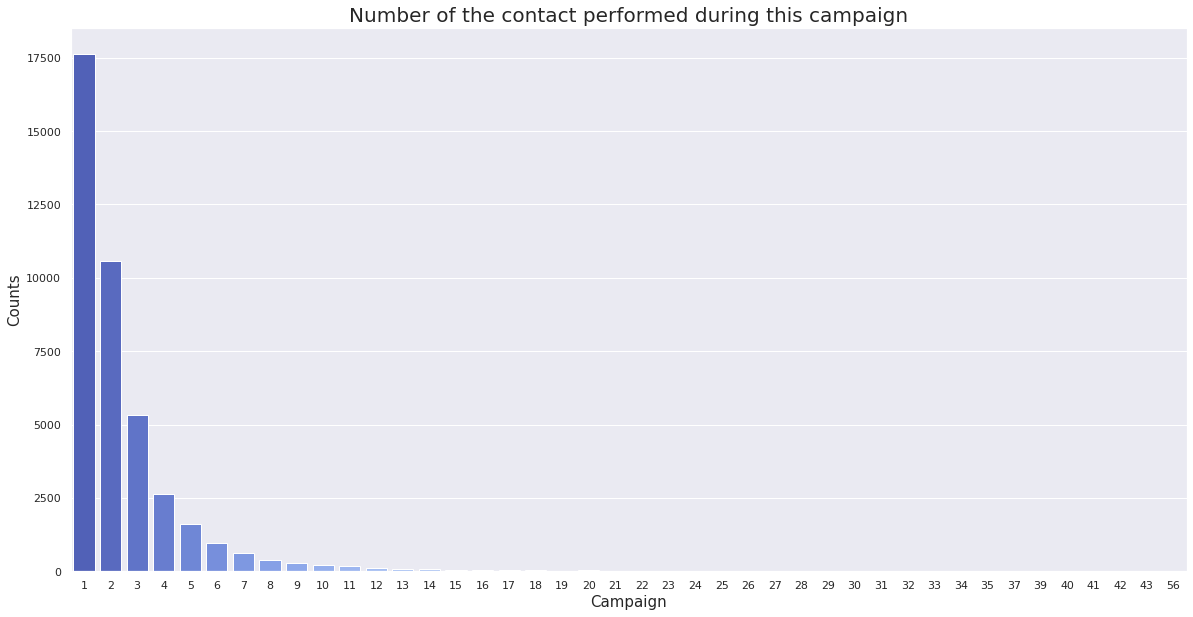

In [ ]:
v = df.campaign.value_counts()

plt.figure(figsize = (20,10))
sns.set_style('darkgrid')
ax = sns.barplot(x = v.index, y = v.values, data = df, palette = 'coolwarm')

plt.title('Number of the contact performed during this campaign', fontsize = 20)
plt.xlabel('Campaign',fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.show()

__Insights:__
- From the analysis, Mostly number of contacts performed 1,2,3 & 4 during  campaign(current campagin).

### 2.15  

-  pdays: number of days that passed by after the client was last contacted from a previous campaign 

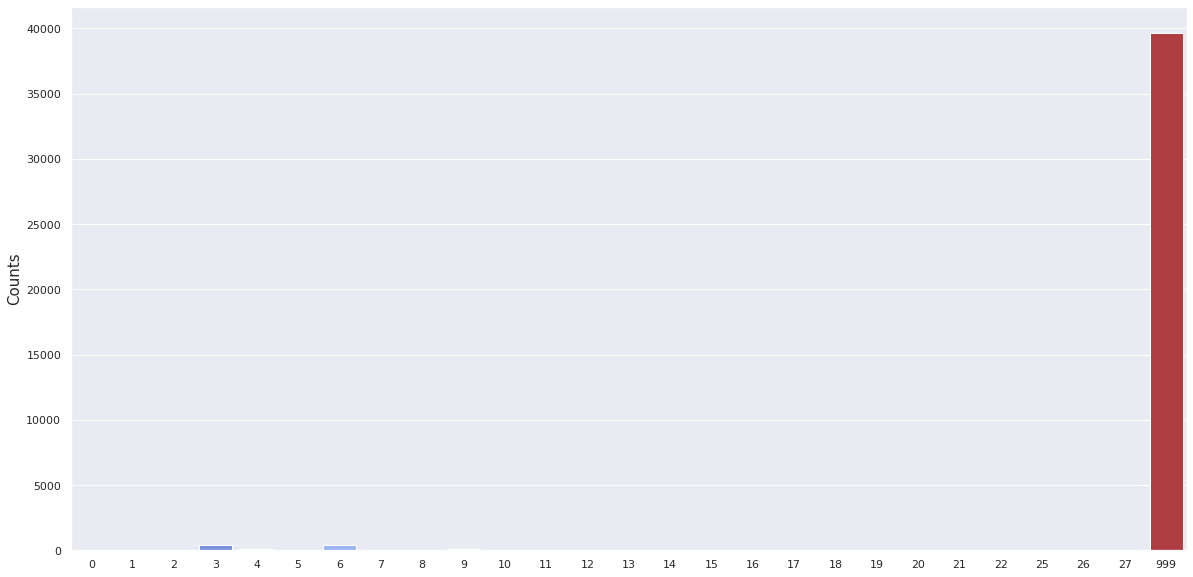

In [ ]:
v = df.pdays.value_counts()

plt.figure(figsize = (20,10))
sns.set_style('darkgrid')
ax = sns.barplot(x = v.index, y = v.values, data = df, palette = 'coolwarm')

plt.title('', fontsize = 20)
plt.xlabel('',fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.show()

__Insights:__
- From the analysis, Mostly 999  days passed by after the client was last contacted from a previous campaign.

### 2.15 Number of contacts performed before this campaign and for this client.

- previous: number of contacts performed before this campaign and for this client.

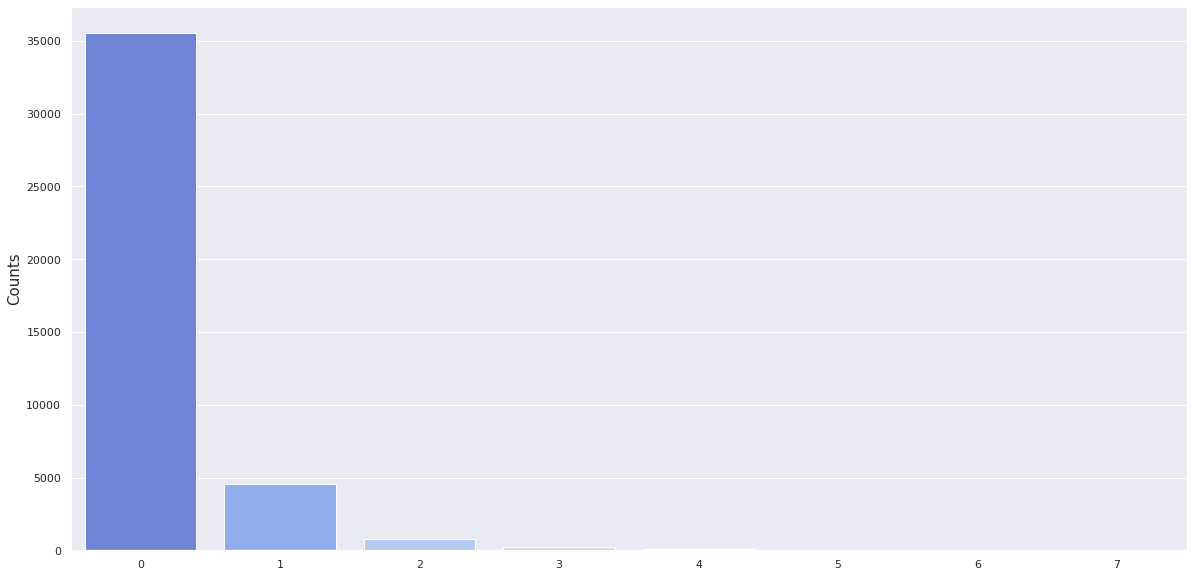

In [ ]:
v = df.previous.value_counts()

plt.figure(figsize = (20,10))
sns.set_style('darkgrid')
ax = sns.barplot(x = v.index, y = v.values, data = df, palette = 'coolwarm')

plt.title('', fontsize = 20)
plt.xlabel('',fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.show()

__Insights:__
- From the analysis, number of contacts performed before this campaign and for this client were 0, 1 & 2 times.


#### 2.16 Outcome of the previous marketing campaign

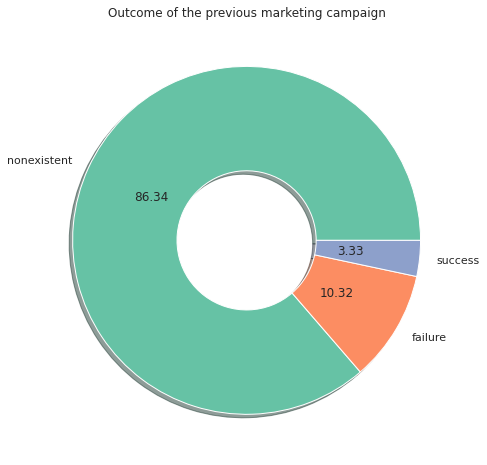

In [ ]:
v = df.poutcome.value_counts()

fig = plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, autopct = '%0.02f', colors = color, shadow = True, wedgeprops  = dict(width = 0.6,))
plt.title('Outcome of the previous marketing campaign')
plt.show()

__Insights:__
- From the analysis, Outcome of the previous marketing campaign  approx 
86% nonexistent, 10.32% failure & 3.33% sucess.

## 2.17 Analysis of term deposit w.r.t. Client Information

### 2.17.1 Analysis of term deposit w.r.t. age (Client Information)

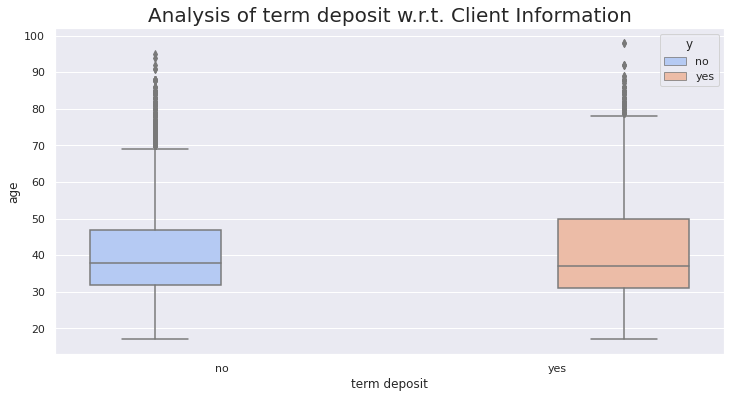

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'y', y=  'age', hue = 'y', data = df, palette = 'coolwarm')
plt.title('Analysis of term deposit w.r.t. Client Information', fontsize = 20)
plt.xlabel('term deposit')
plt.show()

### 2.17.2 Analysis of term deposit w.r.t to job occupation

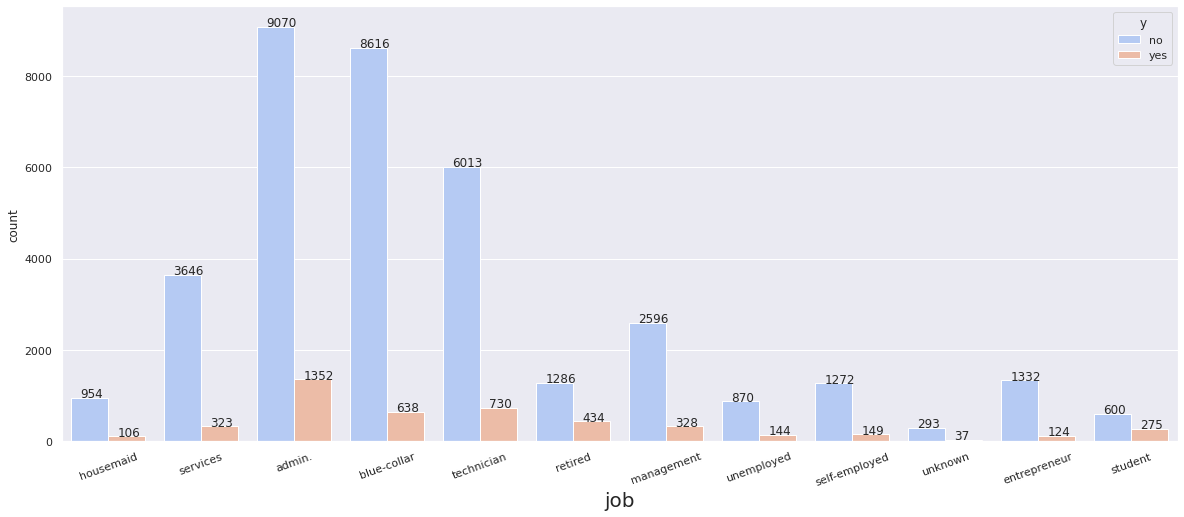

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'job', data = df, hue = 'y', palette = 'coolwarm')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation = 20)
plt.xlabel('job', fontsize = 20)
plt.show()

__Insights:__
- From the analysis, admin & technician job categories  term deposit higher compare to others.

### 2.17.3  Analysis of term deposit w.r.t to marital status

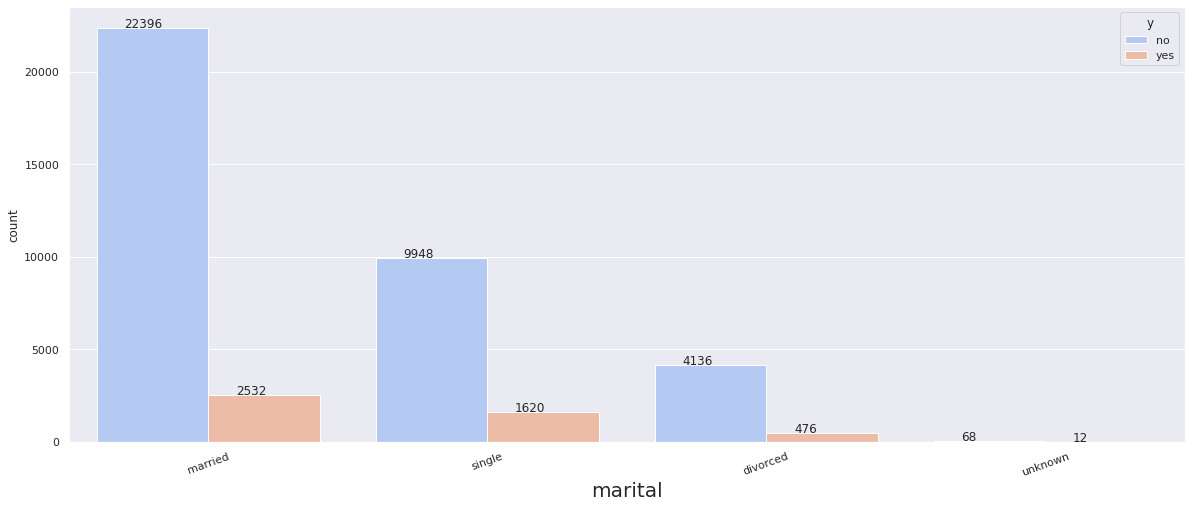

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'marital', data = df, hue = 'y', palette = 'coolwarm')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation = 20)
plt.xlabel('marital', fontsize = 20)
plt.show()

__Insights:__
- From the analysis, married & single category term deposit higher comapre to other marital category.

### 2.17.4 Analysis of term deposit w.r.t to education status

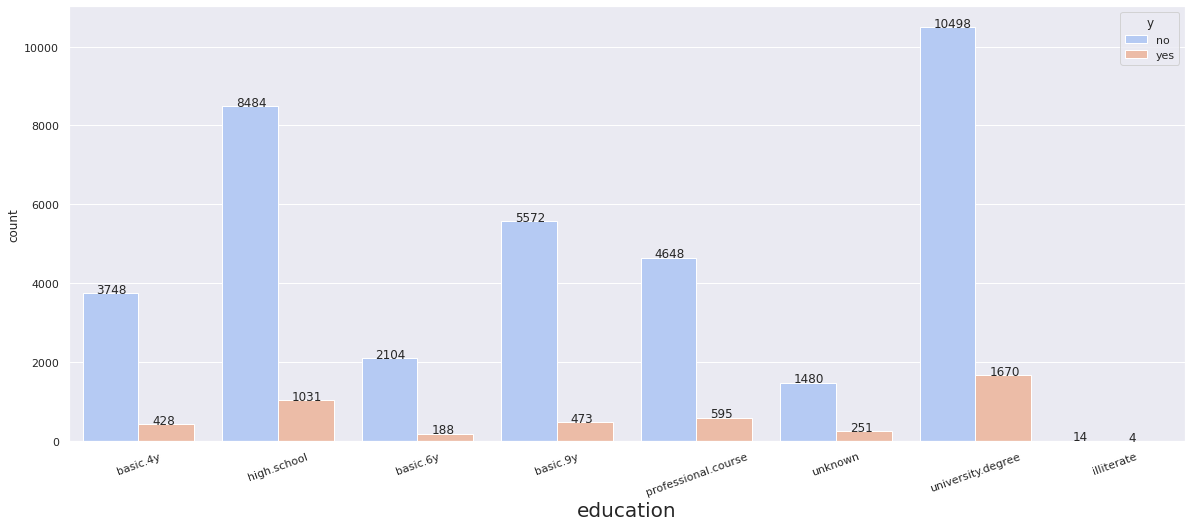

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'education', data = df, hue = 'y',palette = 'coolwarm')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation = 20)
plt.xlabel('education', fontsize = 20)
plt.show()

__Insights:__
- From the analysis, univrsity.degree clients term deposit was higher. 

### 2.17.5 Analysis of term deposit w.r.t to default

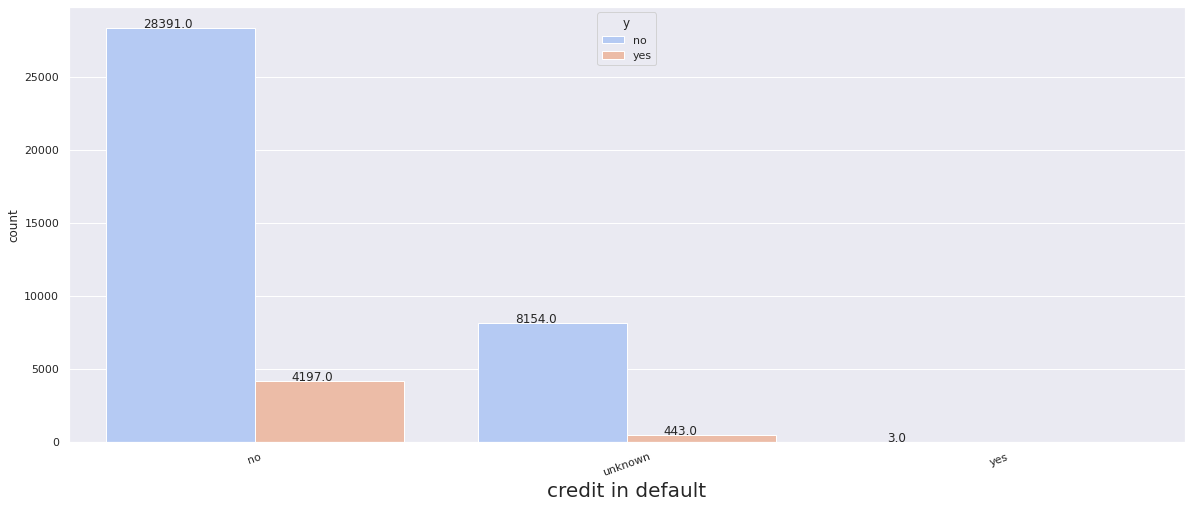

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'default', data = df, hue = 'y',palette = 'coolwarm')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation = 20)
plt.xlabel('credit in default', fontsize = 20)
plt.show()

- From the analysis, the clients those credit not in default have higher term deposit subcription.

### 2.17.6 Analysis of term deposit w.r.t house loan

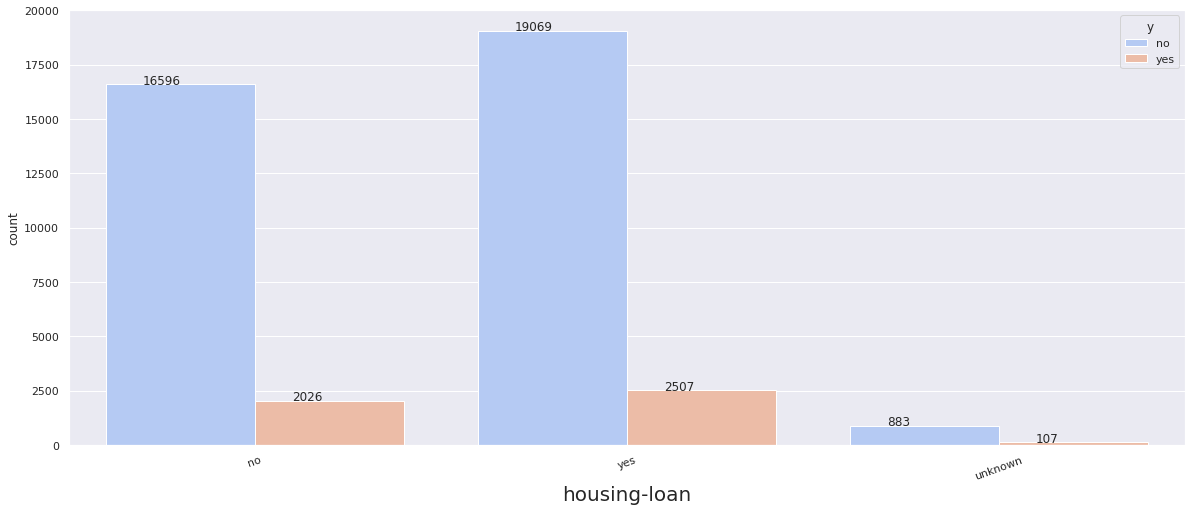

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'housing', data = df, hue = 'y',palette = 'coolwarm')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation = 20)
plt.xlabel('housing-loan', fontsize = 20)
plt.show()

__Insights:__
- From the analysis, clients those have house-loan also the term deposit subcrption is higher compare to clients those don't have house loan clients.

### 2.17.7 Analysis of term deposit w.r.t personal loan

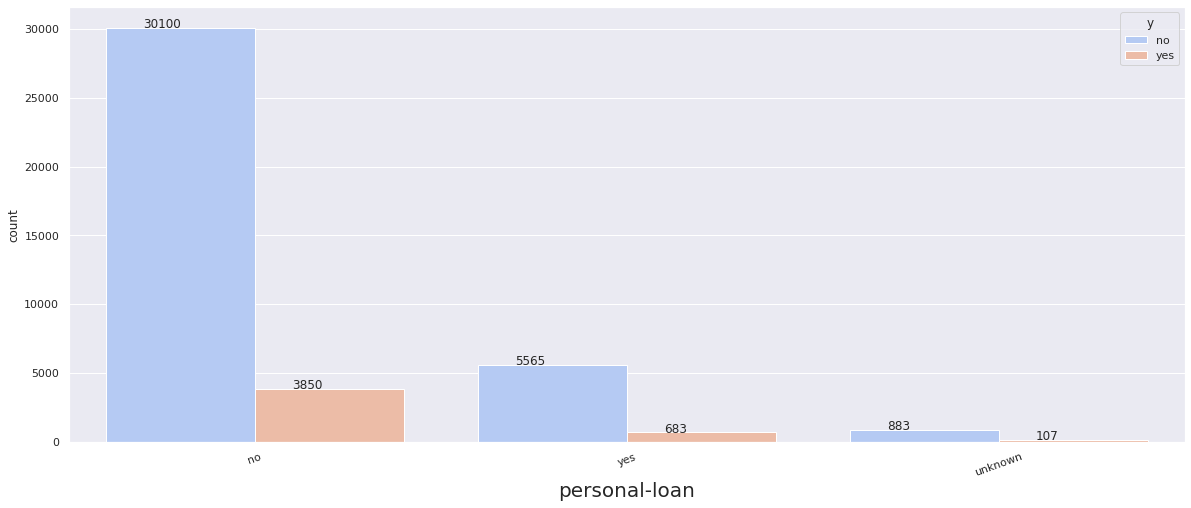

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'loan', data = df, hue = 'y',palette = 'coolwarm')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation = 20)
plt.xlabel('personal-loan', fontsize = 20)
plt.show()

__Insights:__
- From the analysis, clients those don't have personal-loan also the term deposit subcrption is higher compare to clients those  have personal-loan clients.

### 2.17.8 Analysis of term deposit w.r.t contact

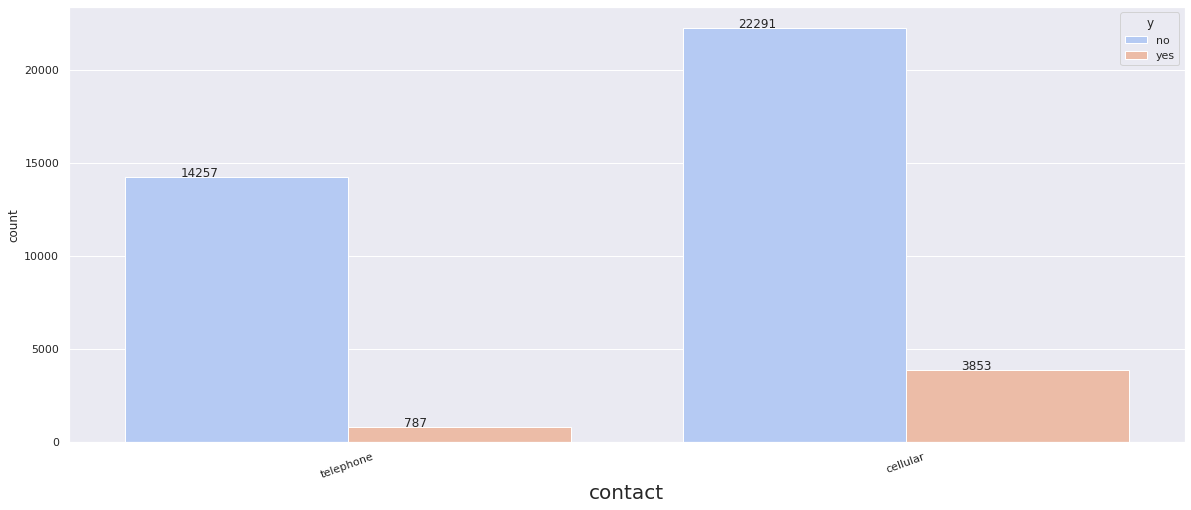

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'contact', data = df, hue = 'y',palette = 'coolwarm')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation = 20)
plt.xlabel('contact', fontsize = 20)
plt.show()

__Insights:__
- From the analysis clients term deposit subcription is higher,if    contacts by the cellular phone.

### 2.17.9 Analysis of term deposit w.r.t month

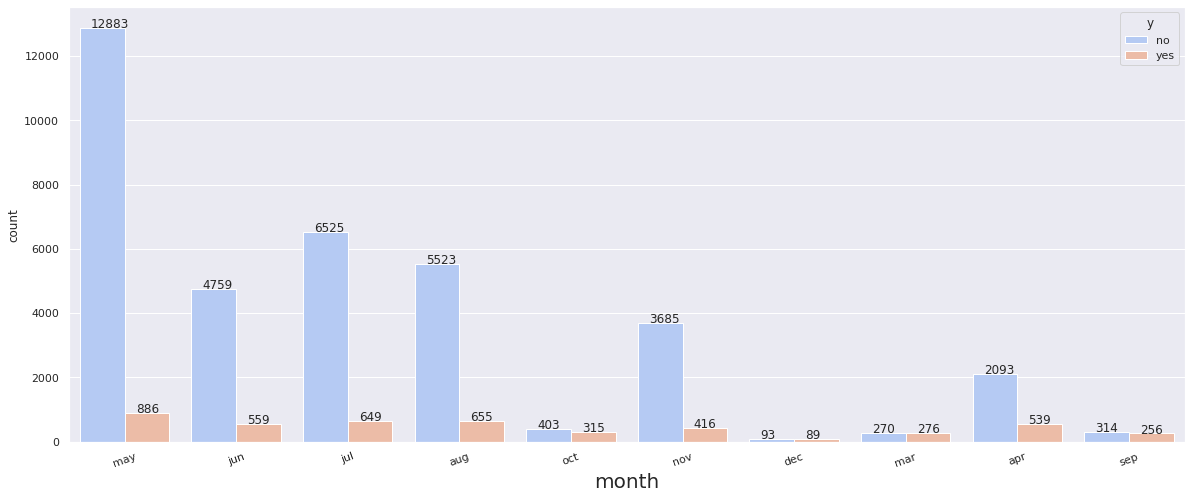

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'month', data = df, hue = 'y',palette = 'coolwarm')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation = 20)
plt.xlabel('month', fontsize = 20)
plt.show()

__Insights:__
- From the analysis, term deposit is higher in may month compare to other months.


### 2.17.10 Analysis of term deposit w.r.t day_of_week

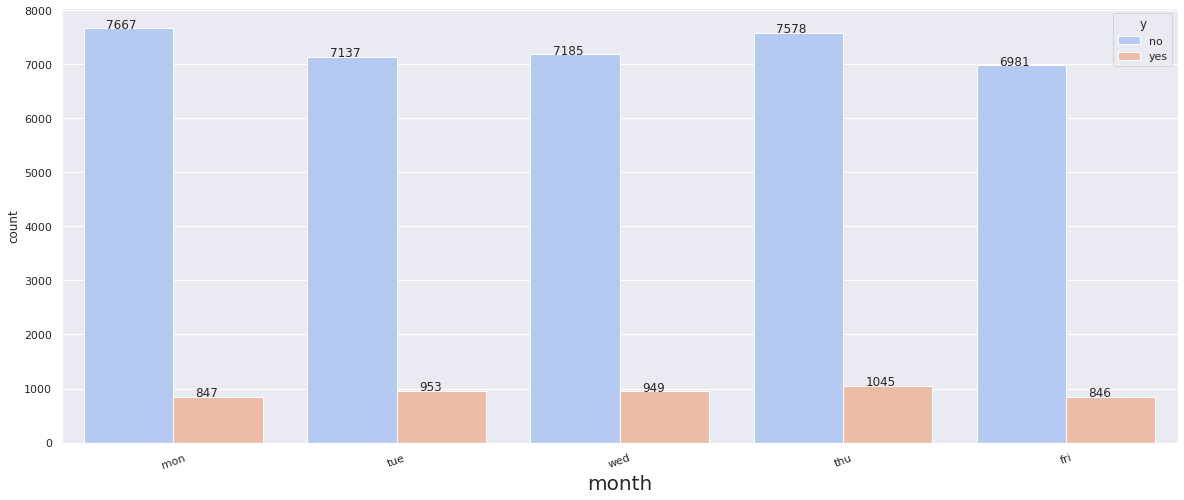

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'day_of_week', data = df, hue = 'y',palette = 'coolwarm')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation = 20)
plt.xlabel('month', fontsize = 20)
plt.show()

### 2.17.11 Analysis of term deposit w.r.t month and day_of_week

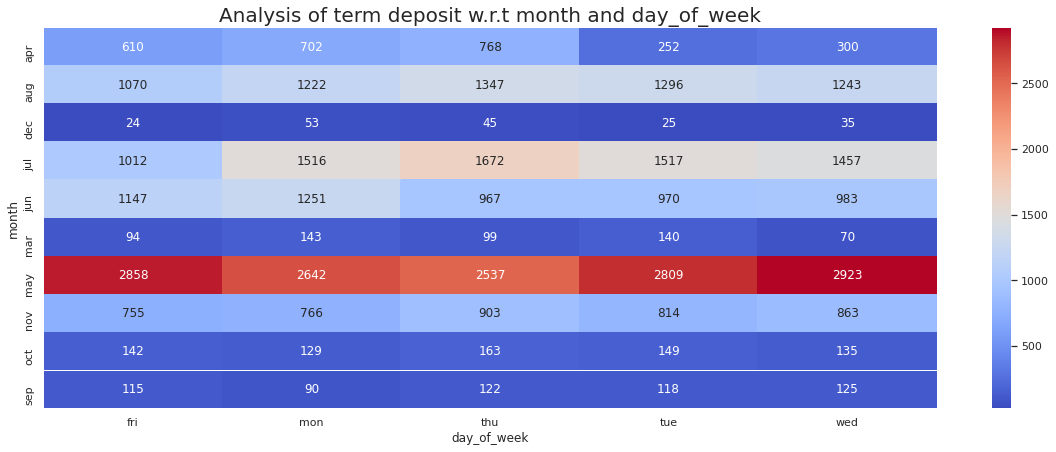

In [ ]:
grp = df.groupby(['month', 'day_of_week'])['y'].agg('count').reset_index()

group_df = grp.pivot('month', 'day_of_week', 'y')

plt.figure(figsize=  (20,7))
sns.heatmap(group_df,cmap = 'coolwarm', linewidths= .0001, annot= True, fmt='g')

plt.title('Analysis of term deposit w.r.t month and day_of_week', fontsize = 20)
plt.show()

__Insights:__
- From the analysis, the client term deposit subcription is higher in may month and Most of the subscription happend on  webnesday in may month.

### 2.17.12 Analysis of term deposit w.r.t campaign

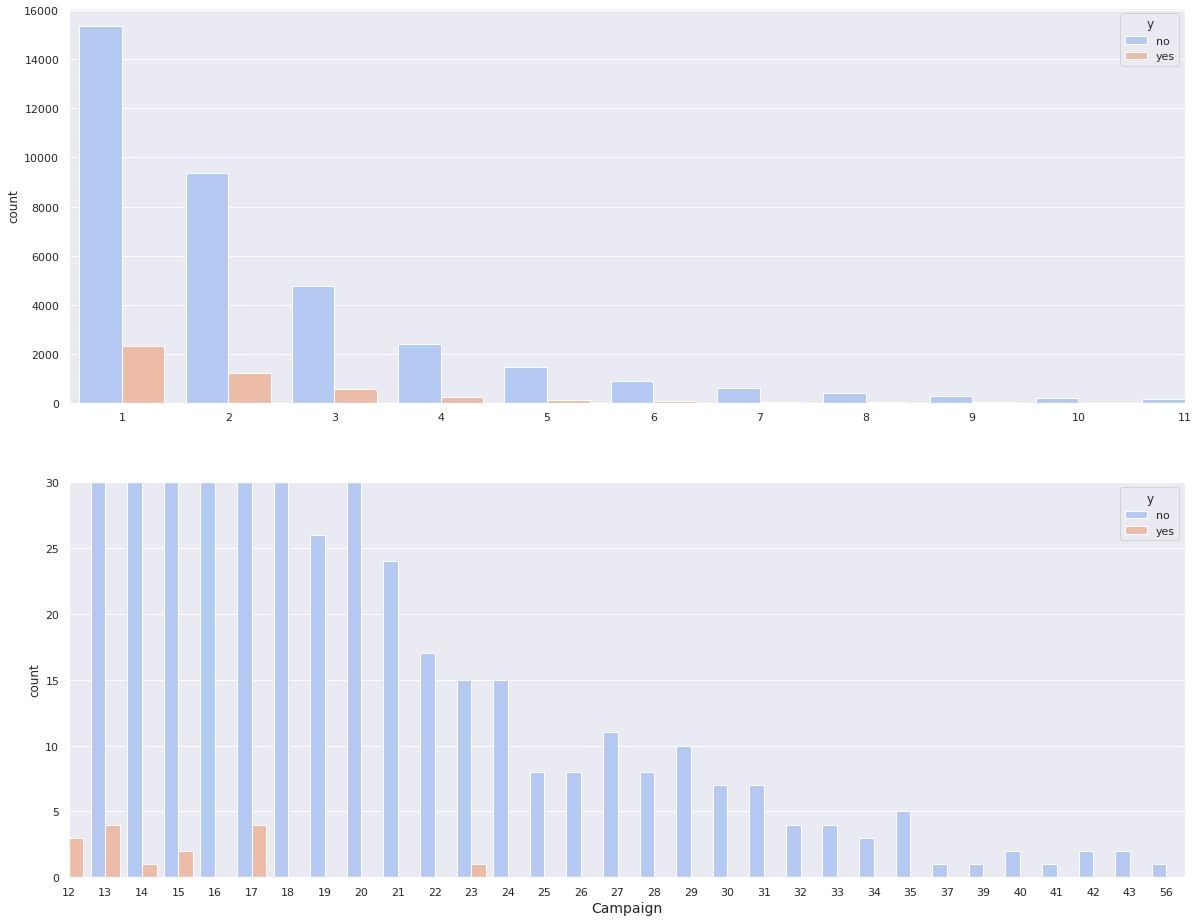

In [ ]:
plt.figure(figsize=(20, 16))
plt.subplot(2, 1, 1)
sns.countplot(x='campaign', hue='y', data=df, palette = 'coolwarm')
plt.xlim(right=10)
plt.xlabel('')
plt.subplot(2, 1, 2)
sns.countplot(x='campaign', hue='y', data=df, palette = 'coolwarm')
plt.xlim(left=11)
plt.ylim(top=30)
plt.xlabel('Campaign', fontsize=14)
plt.show()

__Insights:__
- Campaign attribute indicates number of contacts made with customer during this campaign.
- We can see that, as the number of contacts are increasing, lesser the customers are subscribing to the  term deposit.

### 2.17.13 Lets Check the previous term deposit 

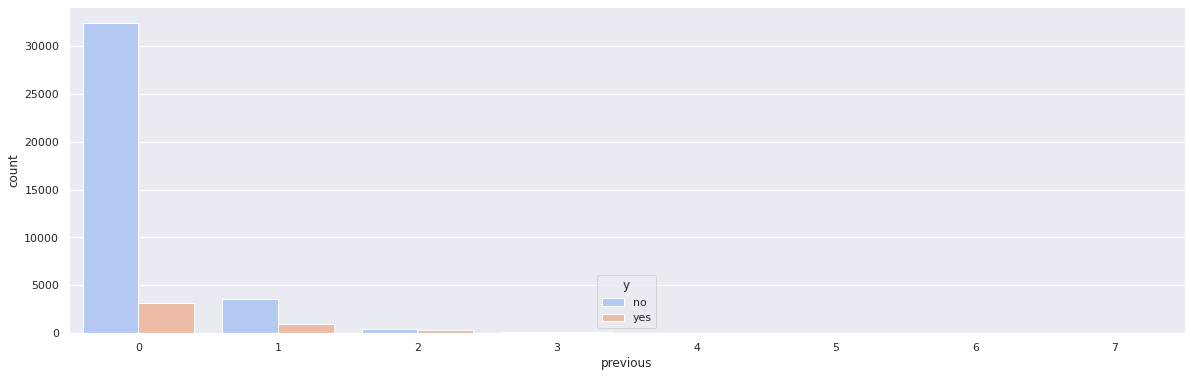

In [ ]:
plt.figure(figsize = (20,6))
ax = sns.countplot(x = 'previous', data = df, hue = 'y', palette = 'coolwarm')


### 2.17.14 Analysis of term deposit w.r.t previous outcome

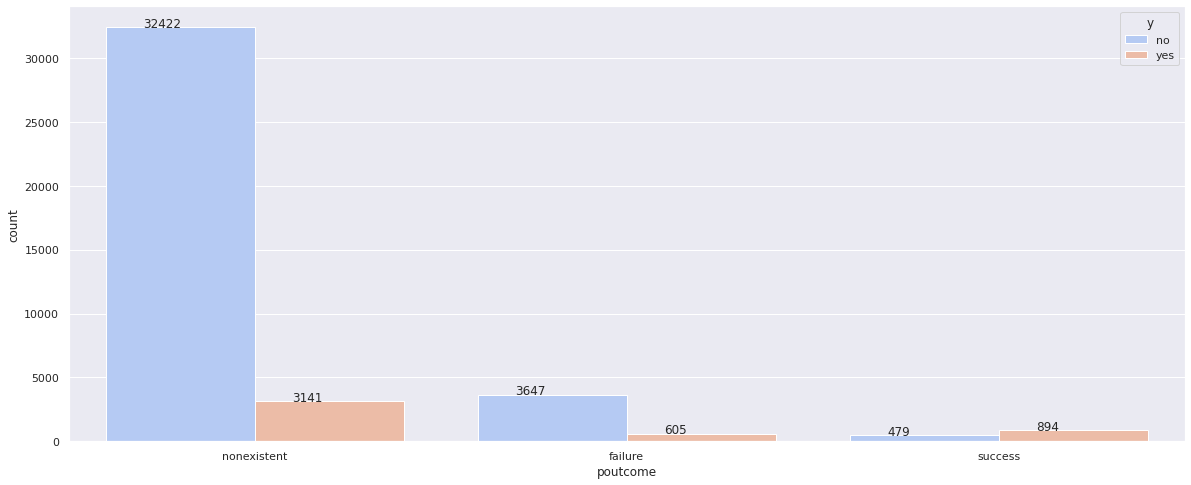

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x="poutcome", hue="y", data = df,palette = 'coolwarm')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.show()

- Focusing on success and failure, It is evident that if previous contact results in success there are very high chances that in next contact customer will subscribe to term deposit.
- Another interesting result is that even if the result of previous contact is failure, there is still chance of customer might subscribe to the term deposit.

### 2.18  checking balanced or imbalanced

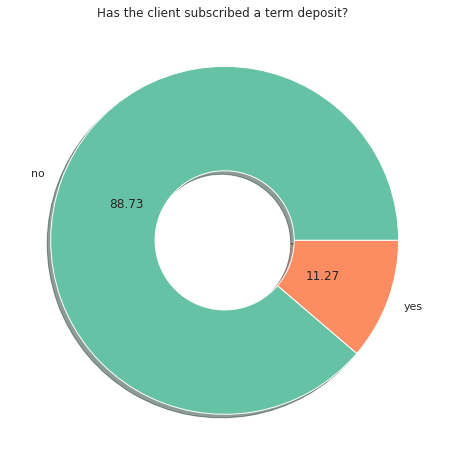

In [ ]:
v = df['y'].value_counts()
fig  =plt.gcf()
fig.set_size_inches((10,8))
cmap = plt.get_cmap('Set2')
color=  cmap(np.arange(len(v)))
plt.pie(v,labels = v.index ,autopct = '%0.02f', colors = color, shadow = True, wedgeprops = dict(width = 0.6), radius = 1)
plt.title('Has the client subscribed a term deposit? ')
plt.show()

- From the analysis, only 11.27 % subscribed the term deposit and 88.73% didnot  subscribed  the term deposit.
- Clearly it is imbalaced dataset. we have to handle it to avoid the bais toward the majority of the class.

### 2.19 checking pair plot

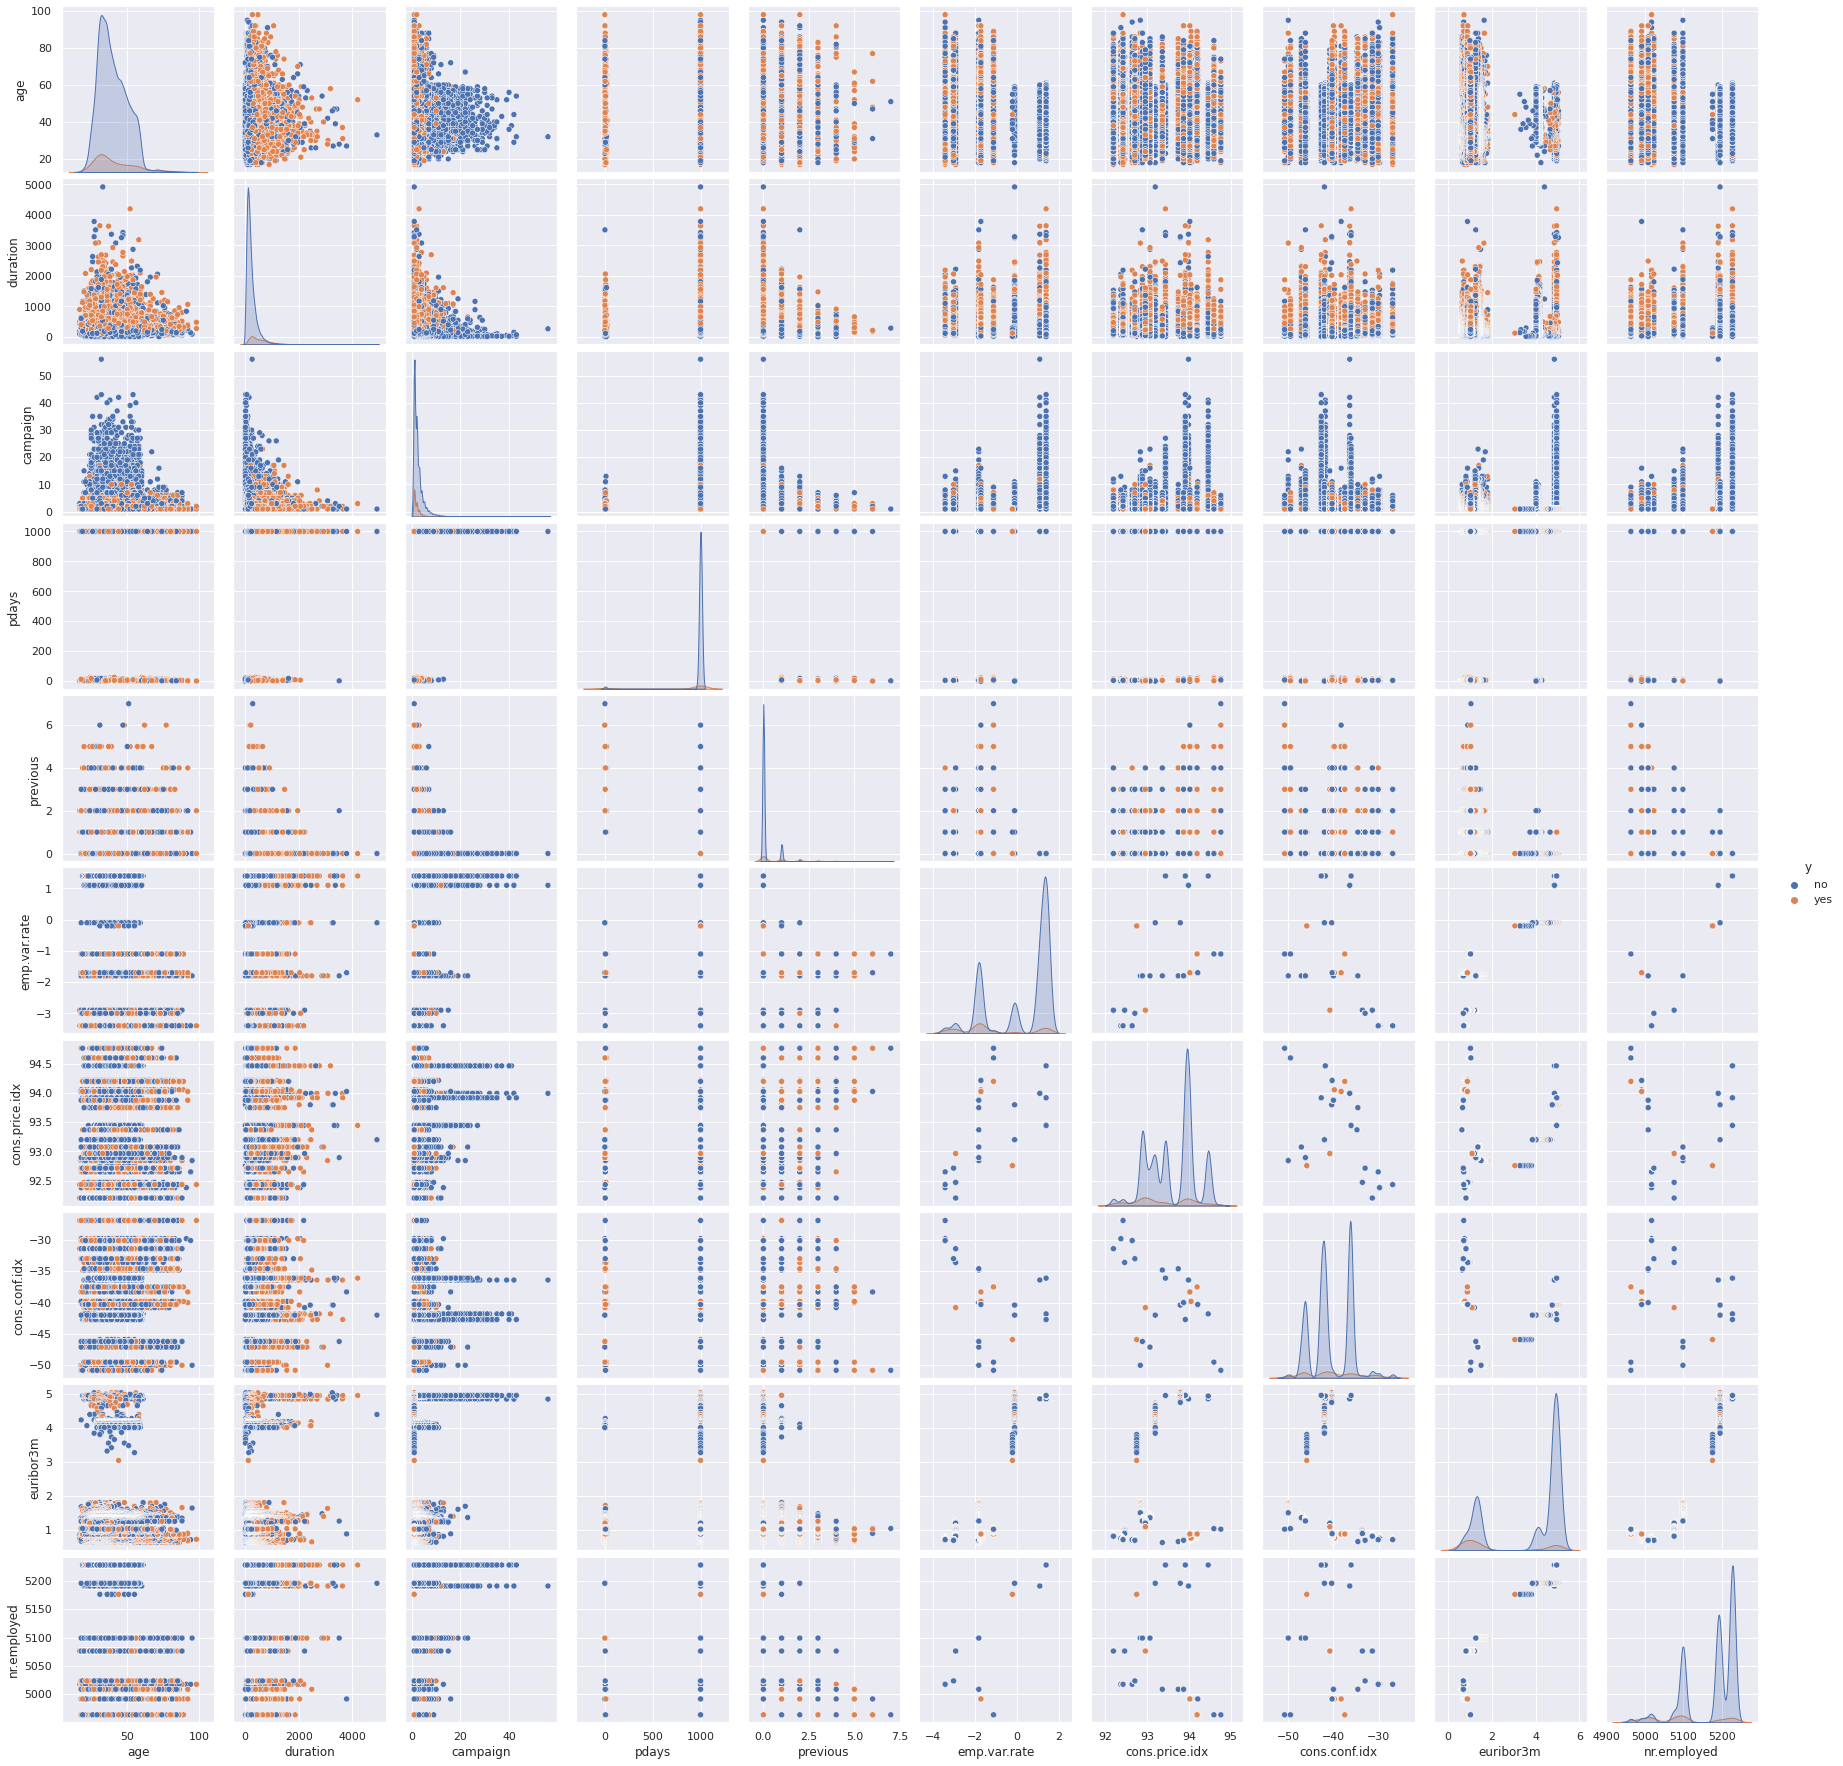

In [ ]:
sns.pairplot(df, hue = 'y')

# 3. Data preparing/feature engineering

### 3.1 Applying Labelencoder

- Converting non numeric data into numeric form.

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])
df['marital'] =  le.fit_transform(df['marital'])
df['education'] =  le.fit_transform(df['education'])
df['default'] =  le.fit_transform(df['default'])
df['housing'] =   le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])

df['contact'] =  le.fit_transform(df['contact'])

df['month'] =  le.fit_transform(df['month'])
df['day_of_week'] = le.fit_transform(df['day_of_week'])

df['poutcome'] =  le.fit_transform(df['poutcome'])

df['y'] = le.fit_transform(df['y'])


In [37]:
### Again checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- Here above all datatype is numeric type.

### 3.2 Correation of dataset

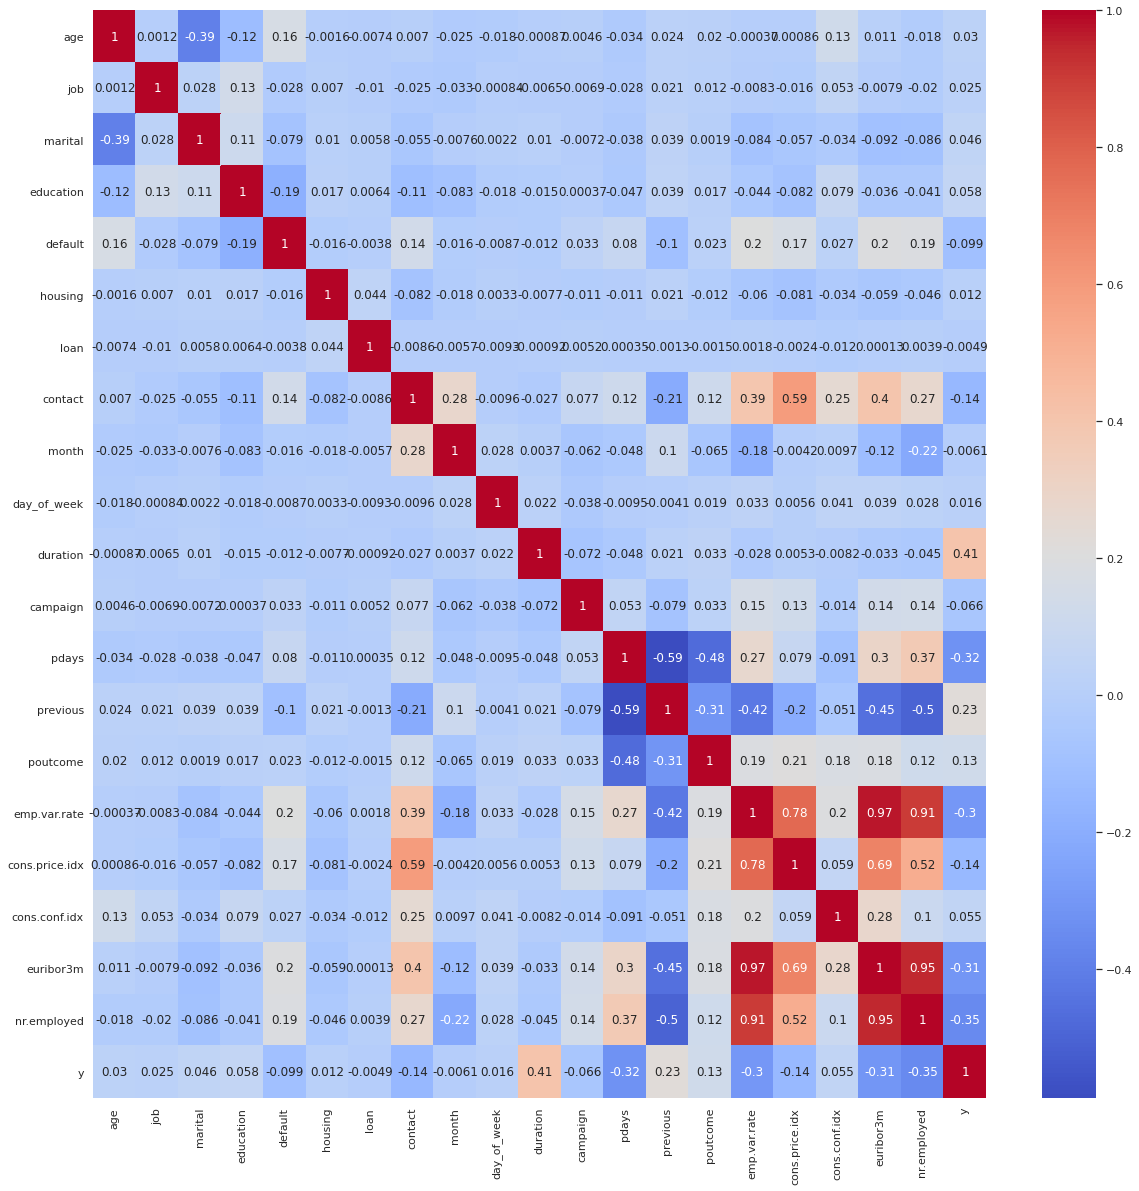

In [38]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cbar = True, cmap  = 'coolwarm')
plt.show()

### 3.3 chekcing the correlation w.r.t term deposit

In [39]:
df.corrwith(df['y']).sort_values()

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
contact          -0.144773
cons.price.idx   -0.136211
default          -0.099352
campaign         -0.066357
month            -0.006065
loan             -0.004909
housing           0.011552
day_of_week       0.015967
job               0.025122
age               0.030399
marital           0.046203
cons.conf.idx     0.054878
education         0.057799
poutcome          0.129789
previous          0.230181
duration          0.405274
y                 1.000000
dtype: float64

### 3.4 Dependent and independent variable

In [40]:
X = df.drop('y', axis = 1)
y = df['y']

In [41]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [42]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

### 3.5 Applying SMOTE technique to handle the imbalance data

In [43]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE(sampling_strategy='auto', random_state = 0, k_neighbors=5).fit_sample(X,y)

In [44]:
X_smote

array([[ 5.60000000e+01,  3.00000000e+00,  1.00000000e+00, ...,
        -3.64000000e+01,  4.85700000e+00,  5.19100000e+03],
       [ 5.70000000e+01,  7.00000000e+00,  1.00000000e+00, ...,
        -3.64000000e+01,  4.85700000e+00,  5.19100000e+03],
       [ 3.70000000e+01,  7.00000000e+00,  1.00000000e+00, ...,
        -3.64000000e+01,  4.85700000e+00,  5.19100000e+03],
       ...,
       [ 3.10000000e+01,  7.77623921e+00,  1.86402658e+00, ...,
        -3.04943229e+01,  7.15048186e-01,  5.01831584e+03],
       [ 3.32288614e+01,  1.52574264e-01,  1.92371287e+00, ...,
        -4.97101089e+01,  1.59416535e+00,  5.09910000e+03],
       [ 3.07001613e+01,  2.99838658e-01,  1.00000000e+00, ...,
        -4.27000000e+01,  4.96270016e+00,  5.22810000e+03]])

In [45]:
y_smote

array([0, 0, 0, ..., 1, 1, 1])

### 3.6 Shape before and after SMOTE

In [46]:
print('Shape of data:', X.shape)  # before SMOTE
print('Shape after SMOTE :', X_smote.shape)  # after SMOTE Shape

Shape of data: (41188, 20)
Shape after SMOTE : (73096, 20)


### 3.7 Splitting data into train and test set

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state = 5, test_size = .3)

### 3.8 Applying Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
X_train

array([[ 0.67069914,  0.64785024, -0.35739542, ...,  1.67432861,
        -1.10663947, -0.68494326],
       [ 0.66824277, -0.92355039,  0.24991992, ..., -0.0235147 ,
        -1.11184472, -1.65991954],
       [-0.45572257, -1.11373309,  1.36679278, ...,  0.72048406,
         1.00210591,  0.6380742 ],
       ...,
       [-0.62901822,  1.5286419 , -0.35739542, ...,  0.77771473,
         1.05979999,  1.06563472],
       [-0.36907475, -1.11373309,  1.36679278, ..., -0.48136008,
         1.0608586 ,  1.06563472],
       [-0.36907475, -0.82013587, -0.35739542, ..., -1.14905127,
        -0.91026785, -0.42103124]])

In [50]:
X_test

array([[-1.06225734, -0.82013587,  1.36679278, ..., -1.14905127,
        -0.88115615, -0.42103124],
       [-0.03293659, -0.74929709, -0.35739542, ..., -0.33861615,
         0.68920306,  0.693392  ],
       [-0.31182686,  1.54856564,  1.36679278, ...,  0.07186976,
        -1.17438284, -1.65991954],
       ...,
       [ 0.23746002, -0.47283922, -0.10245228, ..., -1.14905127,
        -0.88617322, -0.42103124],
       [-1.25339974, -0.14223364,  1.36679278, ...,  1.44287197,
        -1.05139878, -0.68494326],
       [-0.79089765, -1.11373309,  0.84171485, ..., -1.20133773,
        -0.86021035, -0.42103124]])

# 4. Modeling

### Creating Custom function for confusion matric and roc_curve

In [51]:
def plot_confusion_roccurve(y_test, y_pred, y_proba, model_auc_score):
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))

  # display confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  ax1.title.set_text('Confusion Matrix')
  sns.heatmap(cm, cmap = 'coolwarm',  cbar = False, annot = True, fmt = '2g', ax = ax1)
  ax1.set_xlabel("Predicted Values")
  ax1.set_ylabel('Actual Values')
  

  # display  roc-auc curve
  from sklearn.metrics import  roc_curve, roc_auc_score
  fpr,tpr, thresholds = roc_curve(y_test, y_proba) 

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  ax2.plot(fpr,tpr, color = 'darkorange', linewidth = 5, label = 'ROC Curve (area = %0.3f)' % (model_auc_score))
  ax2.plot([0,1],[0,1], 'g--')

  plt.title('Receiver Operating Characteristic')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc = 'lower right')
  plt.show()

## 4.1 Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# fitting the model
lr.fit(X_train,y_train)

# predict the test set
y_pred = lr.predict(X_test)

# Evaluate the model performance

cm = confusion_matrix(y_test, y_pred)

print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('--------------------------------------------------------')
print(classification_report(y_test, y_pred))


Accuracy Score : 0.8663413744356788
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     10941
           1       0.86      0.87      0.87     10988

    accuracy                           0.87     21929
   macro avg       0.87      0.87      0.87     21929
weighted avg       0.87      0.87      0.87     21929



In [53]:
# AUC score for logistic Regression
y_proba  = lr.predict_proba(X_test)[:,1]
lr_auc_score = roc_auc_score(y_test, y_proba)
print(lr_auc_score)

0.9342783131697507


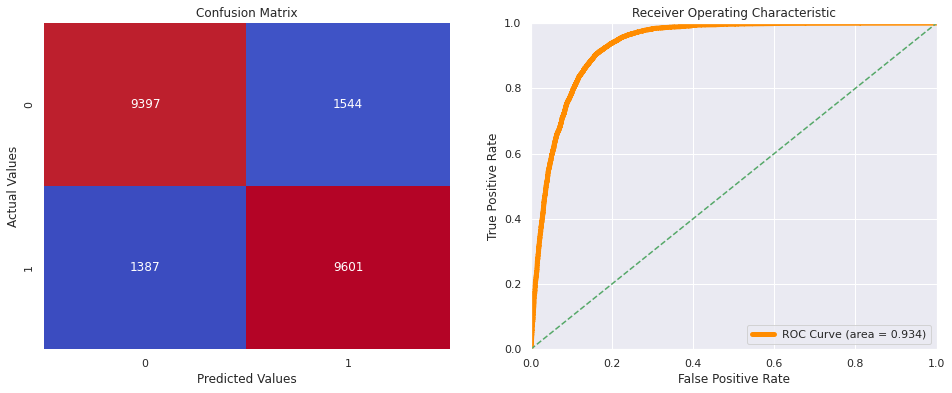

In [54]:
plot_confusion_roccurve(y_test, y_pred, y_proba,lr_auc_score)


### 4.2 Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_features=None, random_state = 42)

# fitting the model
dt.fit(X_train,y_train)

# predict the test set
y_pred = dt.predict(X_test)

# Evaluate the model performance
cm = confusion_matrix(y_test, y_pred)

print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('--------------------------------------------------------')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.9297277577636919
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10941
           1       0.93      0.93      0.93     10988

    accuracy                           0.93     21929
   macro avg       0.93      0.93      0.93     21929
weighted avg       0.93      0.93      0.93     21929



In [ ]:
# AUC score for Decision Tree
y_proba  = dt.predict_proba(X_test)[:,1]
dt_auc_score = roc_auc_score(y_test, y_proba)
print(dt_auc_score)

0.9297279236445991


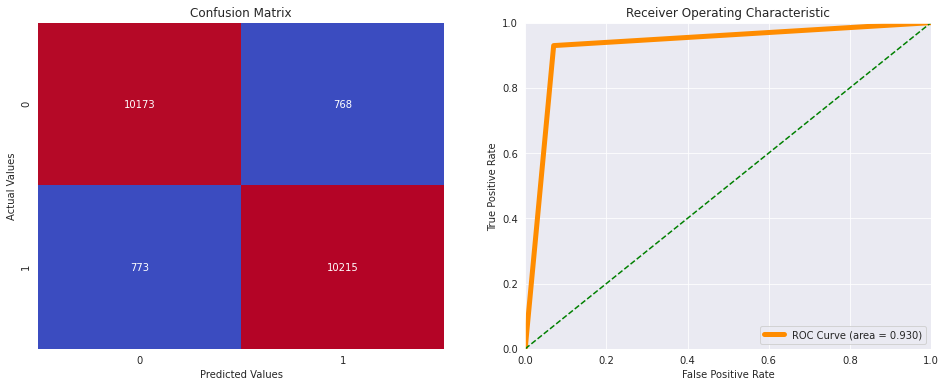

In [ ]:
plot_confusion_roccurve(y_test, y_pred, y_proba,dt_auc_score)

### 4.3 Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', max_features='auto', random_state = 42)

# fitting the model
rf.fit(X_train,y_train)

# predict the test set
y_pred = rf.predict(X_test)

# Evaluate the model performance
cm = confusion_matrix(y_test, y_pred)

print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('--------------------------------------------------------')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.9523006065028045
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10941
           1       0.95      0.95      0.95     10988

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



In [ ]:
# AUC socre for Random Forest

y_proba  = rf.predict_proba(X_test)[:,1]
rf_auc_score = roc_auc_score(y_test, y_proba)
print(rf_auc_score)

0.9928827185306421


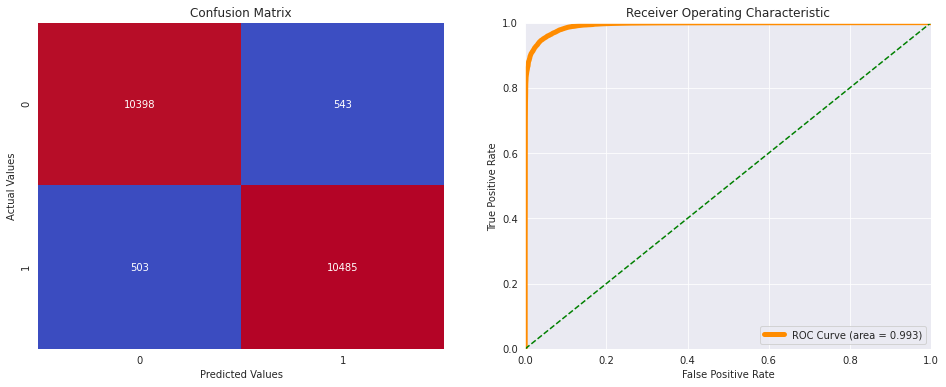

In [ ]:
plot_confusion_roccurve(y_test, y_pred, y_proba,rf_auc_score)

### 4.4 Extra Tree Classifier

`** 1. Random Forest and Extra tree classifier are approximately similar but the only difference between them Random Forest use best splitter at decision node and Extra tree classifier use random split at decision node.**`




In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(bootstrap=False, criterion='gini', max_features='auto')

# fitting the model
etc.fit(X_train,y_train)

# predict the test set
y_pred = etc.predict(X_test)

# Evaluate the model performance
cm = confusion_matrix(y_test, y_pred)

print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('--------------------------------------------------------')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.9568607779652515
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     10941
           1       0.95      0.96      0.96     10988

    accuracy                           0.96     21929
   macro avg       0.96      0.96      0.96     21929
weighted avg       0.96      0.96      0.96     21929



In [ ]:
# AUC score for extra tree Classifier

y_proba = etc.predict_proba(X_test)[:,1]
etc_auc_score = roc_auc_score(y_test, y_proba)
print(etc_auc_score)

0.9936312522070008


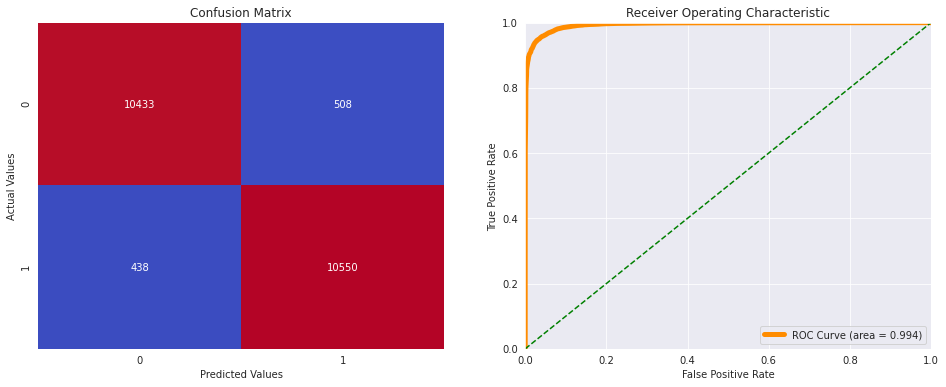

In [ ]:
plot_confusion_roccurve(y_test, y_pred, y_proba, etc_auc_score)

### 4.5 SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1.0,kernel='rbf', random_state= 42, probability= True)

# fitting the model
svc.fit(X_train,y_train)

# predict the test set
y_pred = svc.predict(X_test)

# Evaluate the model performance
cm = confusion_matrix(y_test, y_pred)

print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('--------------------------------------------------------')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.9222946782799033
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     10941
           1       0.91      0.94      0.92     10988

    accuracy                           0.92     21929
   macro avg       0.92      0.92      0.92     21929
weighted avg       0.92      0.92      0.92     21929



In [ ]:
# AUC score for extra tree Classifier

y_proba = svc.predict_proba(X_test)[:,1]
svc_auc_score = roc_auc_score(y_test, y_proba)
print(svc_auc_score)

0.9758221755121881


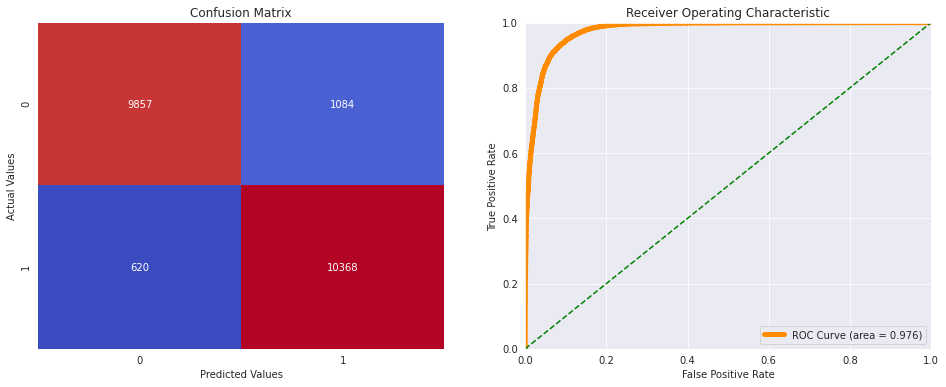

In [ ]:
plot_confusion_roccurve(y_test, y_pred, y_proba, svc_auc_score)

### 4.6 XgBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xbc = XGBClassifier(booster='gbtree', learning_rate=0.1,  random_state= 42)

# fitting the model
xbc.fit(X_train,y_train)

# predict the test set
y_pred = xbc.predict(X_test)

# Evaluate the model performance
cm = confusion_matrix(y_test, y_pred)

print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('--------------------------------------------------------')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.9466459938893702
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10941
           1       0.94      0.95      0.95     10988

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



In [ ]:
# AUC score for Xgboost Classifier

y_proba = xbc.predict_proba(X_test)[:,1]
xbc_auc_score = roc_auc_score(y_test, y_proba)
print(xbc_auc_score)

0.9914801947447753


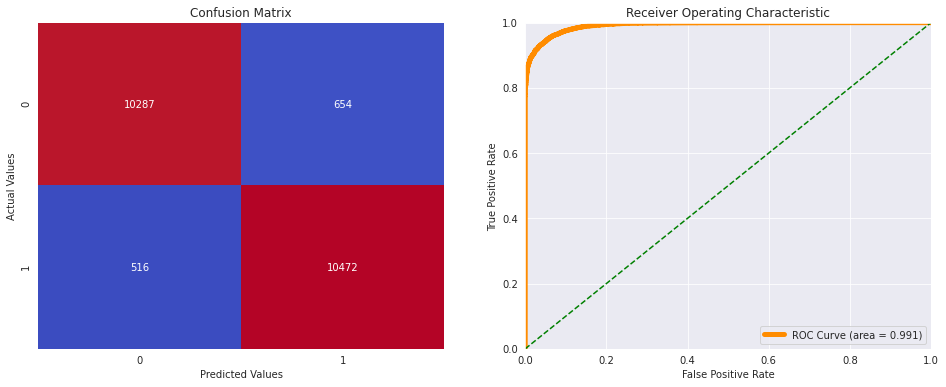

In [ ]:
plot_confusion_roccurve(y_test, y_pred, y_proba, xbc_auc_score) # xgboost classifier

### 5. Cross validation socre of random forest

- Random Forest outperforming the other model. So we choose Random Forest to this usecase. 

In [ ]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(rf, X_train, y_train, cv  =10)
print('Random Forest cross validation score :',cvs.mean())
print('training score :', rf.score(X_train, y_train))
print('test Score :', rf.score(X_test, y_pred))

Random Forest cross validation score : 0.9548928184470873
training score : 0.9999804561533802
test Score : 0.9695380546308541


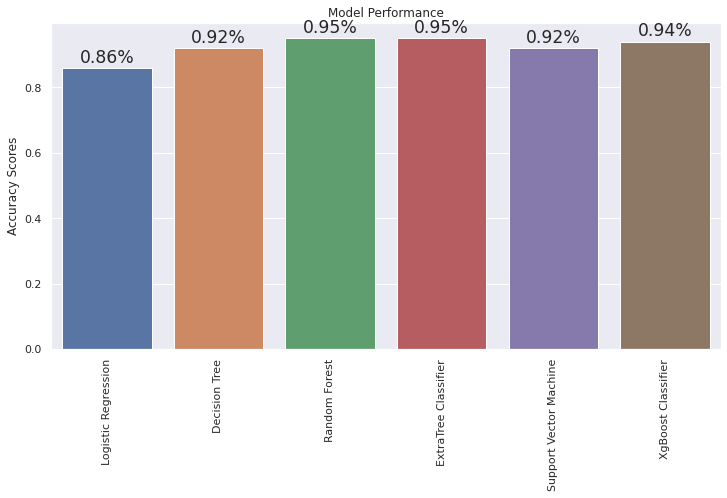

In [66]:

plt.figure(figsize = (12,6))

label = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'ExtraTree Classifier', 'Support Vector Machine', 'XgBoost Classifier',]
acc_score = [0.86, 0.92, 0.95, 0.95, 0.92, 0.94]

ax = sns.barplot(x = label, y = acc_score)
plt.xticks(rotation = 90)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')



plt.title('Model Performance')
plt.ylabel('Accuracy Scores')
plt.show()


# 6. Conclusion:

__Client information :__
- From the analysis, the average age of client approx 40 and Minimum: 18 years old and Maximum: approx 95 years old.

- From the analysis, 25.30% people do admin jobs, 22.47% people do blue-collar and  16.37% do technician jobs. 
- From the analysis, 60.52% were married, 28.09% single,  11.20% divorced and 0.19% unknown.Mostly were married.
- From the analysis, approx 29.54% client have university degree ,23.10% clients high school graduated and 0.04% clients illiterate.
- From the analysis, 79.12% credit not in default, 20.87% unknown and 0.01% in default.
- From the analysis, 52.38% client have house loan and 45.21% clients don't have house loan and 2.40% unknown. 
- From the analysis, 82.43% client have personal loan and 15.17% clients don't have personal loan and 2.40% unknown. 
- From the analysis, 63.47% contacted by cellular phone, 36.53% through telephone.
- From the analysis, Most of the clients last time contacted during May month of the year and less  clients during december month.
- From the analysis, Most of the clients last time contacted during Monday and thrusday week of the day.
- From the analysis, the duration of contact from  0 to 4918 second and average duration of contact to cilent was 258.28 second.

- From the analysis, maximum call duration happend during november month on monday.

- From the analysis, Mostly number of contacts performed 1,2,3 & 4 during  campaign(current campagin).

- From the analysis, Mostly 999  days passed by after the client was last contacted from a previous campaign.

- From the analysis, Outcome of the previous marketing campaign  approx 
86% nonexistent, 10.32% failure & 3.33% sucess.
---

__Analysis of term deposit w.r.t. Client Information :__

  - From the analysis, admin & technician job categories  term deposit higher compare to others.

- From the analysis, married & single category term deposit higher comapre to other marital category.

- From the analysis, university.degree clients term deposit was higher.

- From the analysis, the clients those credit not in default have higher term deposit subcription.

- From the analysis, clients those have house-loan also the term deposit subcrption is higher compare to clients those don't have house-loan clients.
- From the analysis, clients those don't have personal-loan also the term deposit subcrption is higher compare to clients those  have personal-loan clients.
- From the analysis, term deposit is higher in may month compare to other months.
- From the analysis, the client term deposit subcription is higher in may month and Most of the subscription happend on  webnesday in may month.
- From the analysis, as the number of contacts are increasing during campaign, lesser the customers are subscribing to the  term deposit.

- From the analysis of __previous campaign :__ Focusing on success and failure, It is evident that if previous contact results in success there are very high chances that in next contact customer will subscribe to term deposit.Another interesting result is that even if the result of previous contact is failure, there is still chance of customer might subscribe to the term deposit.

- From the analysis, only 11.27 % subscribed the term deposit and 88.73% didnot  subscribed  the term deposit and clearly it is imbalaced dataset. we have to handle it to avoid the bais toward the majority of the class.
---
__Modeling:__ I used Logistic Regression, Random Forest, Decision tree, Support Vector Machine, Extra Tree Classifier & Xgboost classifier .Random Forest outperform the others model.So we can use here Random Forest to predict the client subscribed the term deposit or not.










